# Online Fraud Detection Using Machine Learning


In [ ]:
with open('/content/kaggle.json', 'w') as f:
  f.write('{"username":"raghavendragavuji","key":"ac5ced9e5c8778a54e02d519a35834b3"}')
#incase if this throws an error use your kaggle api key, uncomment below snippet and delete this part of code
'''
with open('/content/kaggle.json', 'w') as f:
  f.write('') # <--copy the content of json file here
'''
#Or You can directly import your api json to colab

"\nwith open('/content/kaggle.json', 'w') as f:\n  f.write('') # <--copy the content of json file here\n"

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d ealaxi/paysim1

 98% 175M/178M [00:02<00:00, 107MB/s]
100% 178M/178M [00:02<00:00, 81.1MB/s]


In [ ]:
!unzip '/content/paysim1.zip'

Archive:  /content/paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the data

In [ ]:
raw_data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [ ]:
raw_data = pd.DataFrame(raw_data)
raw_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
raw_data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
raw_data.shape # total no. of rows and columns in given data

(6362620, 11)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Data Cleaning

In [ ]:
raw_data["type"] = raw_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [ ]:
correlation=raw_data.corr()
correlation['isFraud']

step              0.031578
type              0.016171
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
Name: isFraud, dtype: float64

In [ ]:
raw_data.drop(['isFlaggedFraud','nameOrig','nameDest'],axis=1,inplace=True)
raw_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0


# Feature Engineering

In [ ]:
valueDiffOrig = abs(raw_data.oldbalanceOrg - raw_data.newbalanceOrig)
valueDiffDest = abs(raw_data.oldbalanceDest - raw_data.newbalanceDest)

In [ ]:
raw_data['valueDiffOrig'] = valueDiffOrig
raw_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,valueDiffOrig
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28
2,1,4,181.00,181.0,0.00,0.0,0.0,1,181.00
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,181.00
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14


In [ ]:
raw_data['valueDiffDest'] = valueDiffDest
raw_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,valueDiffOrig,valueDiffDest
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [ ]:
correlation=raw_data.corr()
correlation['isFraud']

step              0.031578
type              0.016171
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
valueDiffOrig     0.364910
valueDiffDest     0.024681
Name: isFraud, dtype: float64

*Here we can see that the 'isFraud' column is mostly related to the difference of the customer balance(valueDiffOrig)*

In [ ]:
feature_list = ['type','amount','oldbalanceOrg','newbalanceOrig','valueDiffOrig','valueDiffDest']
features = raw_data[feature_list]

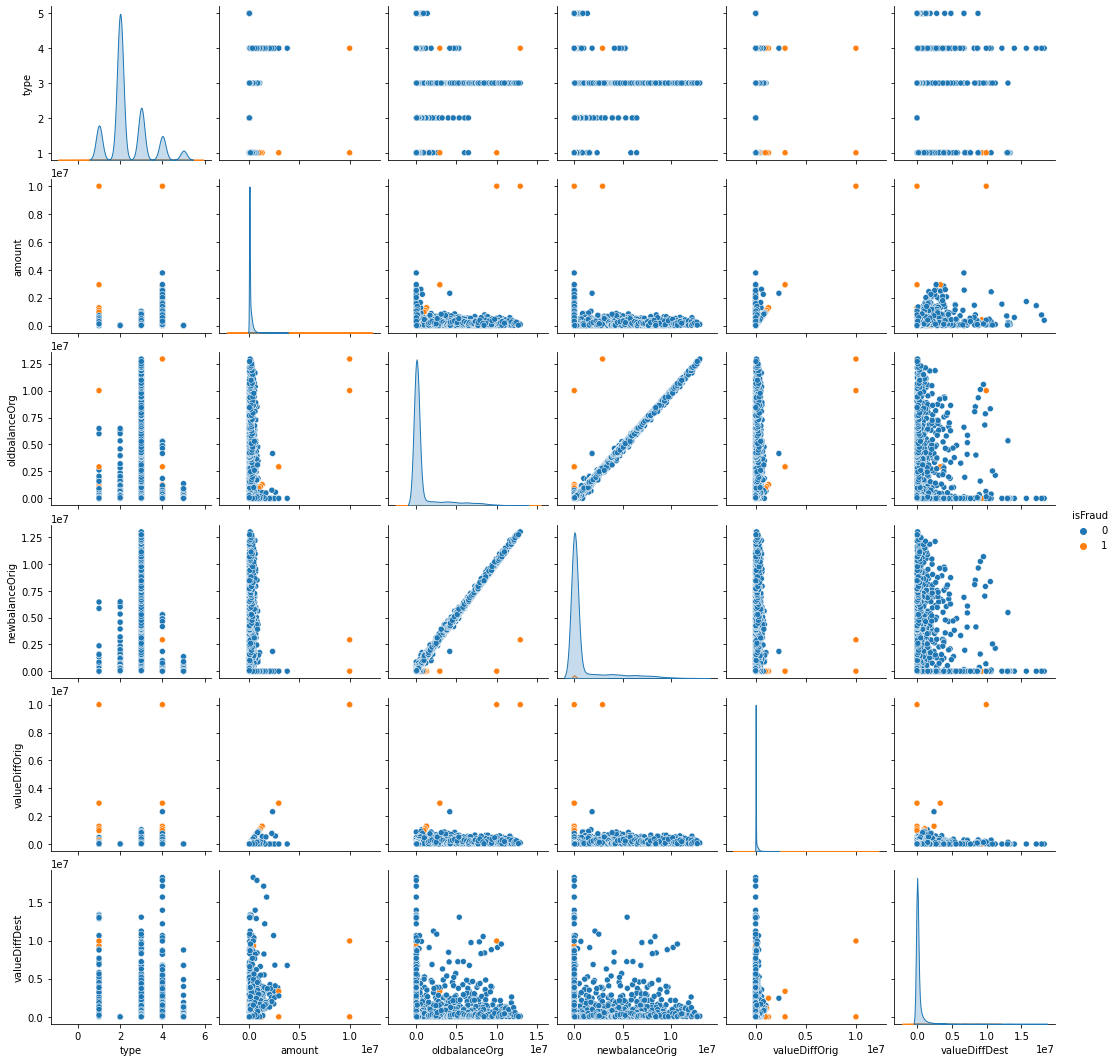

In [ ]:
import seaborn as sns
test_plot = raw_data[1:10000]
sns.pairplot(data=test_plot, hue='isFraud', vars=features)

* *From the charts we can see that most of the Fraudulent cases are detected in 'Cash_out' and 'Transfer' transactions*
* *We an observe that some of the cases which diverge over 0.3% from actual Value differences are found as Fraud cases*

# Training the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x=np.array(raw_data[feature_list])
y=np.array(raw_data[['isFraud']])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Testing the model

In [ ]:
#----training set accuracy-----
score = model.score(x_train,y_train)*100
print(f'Training Accuracy: {score}%')

Training Accuracy: 100.0%


*100% accuracy through training set data*

In [ ]:
#----testing set accuracy-----
test_score = model.score(x_test,y_test)*100
print(f'Testing Accuracy: {test_score}%')

Testing Accuracy: 99.97563896633777%


*Model can Predict whether the transaction is 'Fraud' or no by 99.97% accuracy*

### Saving the model

In [ ]:
import joblib
joblib.dump(model, 'Online_Fraud_detector.joblib')

['Online_Fraud_detector.joblib']

#                -----------Thank You------------